In [1]:
import os
import numpy as np
import pandas as pd

from glob import glob

In [2]:
sub_id = 'FLT01'

In [3]:
func_dir = os.path.join('/bgfs/bchandrasekaran/krs228/',
                        'data/FLT/data_bids/',
                        'sub-%s/func'%sub_id)

In [3]:
func_dir = os.path.join('/bgfs/bchandrasekaran/krs228/',
                        'data/FLT/data_bids/',
                        'sub-%s/func'%sub_id)

file_list = sorted(glob(func_dir+'/*tonecat*events.tsv'))

In [4]:
beh_list = []
for rx, fpath in enumerate(file_list):

    run_df = pd.read_csv(fpath, sep='\t', index_col=0)
    run_df['run'] = rx+1
    
    beh_list.append(run_df)
beh_df = pd.concat(beh_list)
beh_df.dropna(inplace=True)

In [5]:
beh_df

,onset,duration,trial_type,response_time,stim_file,feedback,run
1,2.200000,0.3,di4-aN,0.127454,stimuli/di4-aN_48000Hz_pol2_S15filt.wav,wrong,1
2,8.244379,0.3,di3-iN,0.881855,stimuli/di3-iN_48000Hz_pol2_S15filt.wav,wrong,1
3,14.288180,0.3,di2-bN,1.240418,stimuli/di2-bN_48000Hz_pol2_S15filt.wav,right,1
4,20.333580,0.3,di4-iN,0.891033,stimuli/di4-iN_48000Hz_pol2_S15filt.wav,right,1
5,26.377938,0.3,di3-bN,0.906777,stimuli/di3-bN_48000Hz_pol2_S15filt.wav,right,1
...,...,...,...,...,...,...,...
54,322.282993,0.3,di3-aN,0.733827,stimuli/di3-aN_48000Hz_pol2_S15filt.wav,right,4
55,328.327344,0.3,di2-hN,0.866011,stimuli/di2-hN_48000Hz_pol2_S15filt.wav,right,4
56,334.355911,0.3,di1-hN,0.669706,stimuli/di1-hN_48000Hz_pol2_S15filt.wav,right,4
58,346.443795,0.3,di3-hN,0.792559,stimuli/di3-hN_48000Hz_pol2_S15filt.wav,right,4


In [19]:
beh_df

,onset,duration,trial_type,response_time,stim_file,feedback,run
1,2.200000,0.3,di4-aN,0.127454,stimuli/di4-aN_48000Hz_pol2_S15filt.wav,wrong,1
2,8.244379,0.3,di3-iN,0.881855,stimuli/di3-iN_48000Hz_pol2_S15filt.wav,wrong,1
3,14.288180,0.3,di2-bN,1.240418,stimuli/di2-bN_48000Hz_pol2_S15filt.wav,right,1
4,20.333580,0.3,di4-iN,0.891033,stimuli/di4-iN_48000Hz_pol2_S15filt.wav,right,1
5,26.377938,0.3,di3-bN,0.906777,stimuli/di3-bN_48000Hz_pol2_S15filt.wav,right,1
...,...,...,...,...,...,...,...
61,NaN,NaN,NaN,NaN,NaN,wrong,4
62,NaN,NaN,NaN,NaN,NaN,wrong,4
63,NaN,NaN,NaN,NaN,NaN,wrong,4
64,NaN,NaN,NaN,NaN,NaN,wrong,4


Ah! But my bids-converted events files don't include the actual button responses and what the expected correct response would be. Gotta go back to the source data....

In [6]:
raw_beh_dir = os.path.join('/bgfs/bchandrasekaran/krs228/',
                           'data/FLT/sourcedata/behav_files/',
                           'CHA-IBR/01-ToneLearning')
file_list = sorted(glob(raw_beh_dir+'/sub-%s*tone_learning*.csv'%sub_id))

In [7]:
psy_list = []
for rx, fpath in enumerate(file_list):
    psy_df = pd.read_csv(fpath, sep=',')
    
    psy_list.append(psy_df)
all_df = pd.concat(psy_list)

In [8]:
all_df.columns

Index(['trials.thisRepN', 'trials.thisTrialN', 'trials.thisN',
       'trials.thisIndex', 'soundfile', 'corrAns', 'instruct.started',
       'instruct.stopped', 'key_resp_2.keys', 'key_resp_2.rt',
       'key_resp_2.started', 'key_resp_2.stopped', 'fixation_cross.started',
       'fixation_cross.stopped', 'participant', 'session', 'date', 'expName',
       'psychopyVersion', 'frameRate', 'Unnamed: 20', 'sound_1.started',
       'sound_1.stopped', 'key_resp.keys', 'key_resp.corr', 'key_resp.rt',
       'key_resp.started', 'key_resp.stopped', 'text.started', 'text.stopped',
       'jitter_pre_fb', 'jitter_post_fb', 'jitter_cross_pre_fb.started',
       'jitter_cross_pre_fb.stopped', 'text_2.started', 'text_2.stopped',
       'jitter_cross_post_fb.started', 'jitter_cross_post_fb.stopped',
       'Unnamed: 37', 'last_acq_loop.thisRepN', 'last_acq_loop.thisTrialN',
       'last_acq_loop.thisN', 'last_acq_loop.thisIndex',
       'fixation_cross_2.started', 'fixation_cross_2.stopped', 'Unname

In [9]:
# just keep the critical data columns
simple_df = all_df.loc[:,['key_resp.keys', 'corrAns']].dropna()

In [10]:
simple_df['corrAns'] = simple_df['corrAns'].astype(int)

In [11]:
simple_df.dtypes

key_resp.keys    object
corrAns           int64
dtype: object

In [12]:
renum_simple_df = simple_df.astype(str).replace(['7', '6', '1', '2'], 
                                                ['1', '2', '3', '4'])

In [13]:
renum_simple_df.drop(renum_simple_df[renum_simple_df['key_resp.keys']=='None'].index, inplace=True)

In [14]:
renum_simple_df

,key_resp.keys,corrAns
2,2,3
3,2,2
4,4,4
7,3,3
11,1,1
...,...,...
52,3,3
53,3,3
54,3,3
55,2,2


In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [16]:
y_correct = np.array(renum_simple_df['corrAns'])
y_response = np.array(renum_simple_df['key_resp.keys'])   

cm = confusion_matrix(y_correct, y_response)

In [77]:
from seaborn import heatmap

In [17]:
cm

array([[25,  0,  0,  0],
       [ 0, 25,  0,  0],
       [ 0,  1, 25,  0],
       [ 0,  0,  0, 26]])

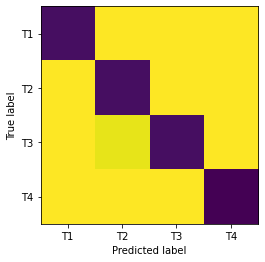

In [36]:
disp = ConfusionMatrixDisplay.from_predictions(y_correct, y_response, 
                                               display_labels=['T1', 'T2', 'T3', 'T4'],
                                               cmap='viridis_r', colorbar=False, include_values=False)


In [19]:
import sklearn; sklearn.__version__

'1.1.1'